In [3]:
import numpy as np
from gym import spaces
import matplotlib.pyplot as plt
from scipy import stats
import random
from recsim import document
from recsim import user
from recsim.choice_model import MultinomialLogitChoiceModel
from recsim.simulator import environment
from recsim.simulator import recsim_gym

2022-11-01 15:05:31.730918: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /raid/home/aayush/git/fitapp_analysis/fitapp_aayush/lib/python3.9/site-packages/cv2/../../lib64:
2022-11-01 15:05:31.730949: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/aayush/git/fitapp_analysis/fitapp_aayush/lib/python3.9/site-packages/flatbuffers/compat.py:19: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/home/aayush/git/fitapp_analysis/fitapp_aayush/lib/python3.9/site-packages/keras/utils/image_utils.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': pil

In [4]:
from typing import Tuple
from pathlib import Path
DATASET_NAME="Spotify"
_DATA_PATH = Path(Path.home() / os.environ.get("DATA_PATH"))
_DATASET_PATH = _DATA_PATH / DATASET_NAME

In [5]:
import pandas as pd
songs=pd.read_feather(_DATASET_PATH)

In [6]:
songs

,year,name,artists,popularity,valence,id,danceability,loudness,speechiness,acousticness,liveness,label
0,1921,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",4,0.0594,4BJqT0PrAfrxzMOxytFOIz,0.279,0.624916,0.0366,0.98200,0.6650,2
1,1921,Clancy Lowered the Boom,['Dennis Day'],5,0.9630,7xPhfUan2yNtyFG0cUWkt8,0.819,0.744797,0.4150,0.73200,0.1600,1
2,1921,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,5,0.0394,1o6I8BglA6ylDMrIELygv1,0.328,0.707071,0.0339,0.96100,0.1010,2
3,1921,Danny Boy,['Frank Parker'],3,0.1650,3ftBPsC5vPBKxYSee08FDH,0.275,0.793736,0.0354,0.96700,0.3810,2
4,1921,When Irish Eyes Are Smiling,['Phil Regan'],2,0.2530,4d6HGyGT8e121BsdKmw9v6,0.418,0.781521,0.0380,0.95700,0.2290,2
...,...,...,...,...,...,...,...,...,...,...,...,...
170648,2020,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",72,0.6080,0KkIkfsLEJbrcIhYsCL7L5,0.786,0.881654,0.0881,0.08460,0.0822,3
170649,2020,Halloweenie III: Seven Days,['Ashnikko'],68,0.7340,0OStKKAuXlxA0fMH54Qs6E,0.717,0.845353,0.0605,0.20600,0.1010,3
170650,2020,AYA,['MAMAMOO'],76,0.6370,4BZXVFYCb76Q0Klojq4piV,0.634,0.904769,0.0809,0.10100,0.2580,3
170651,2020,Darkness,['Eminem'],70,0.1950,5SiZJoLXp3WOl3J4C8IK0d,0.671,0.827484,0.3080,0.00998,0.6430,3


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

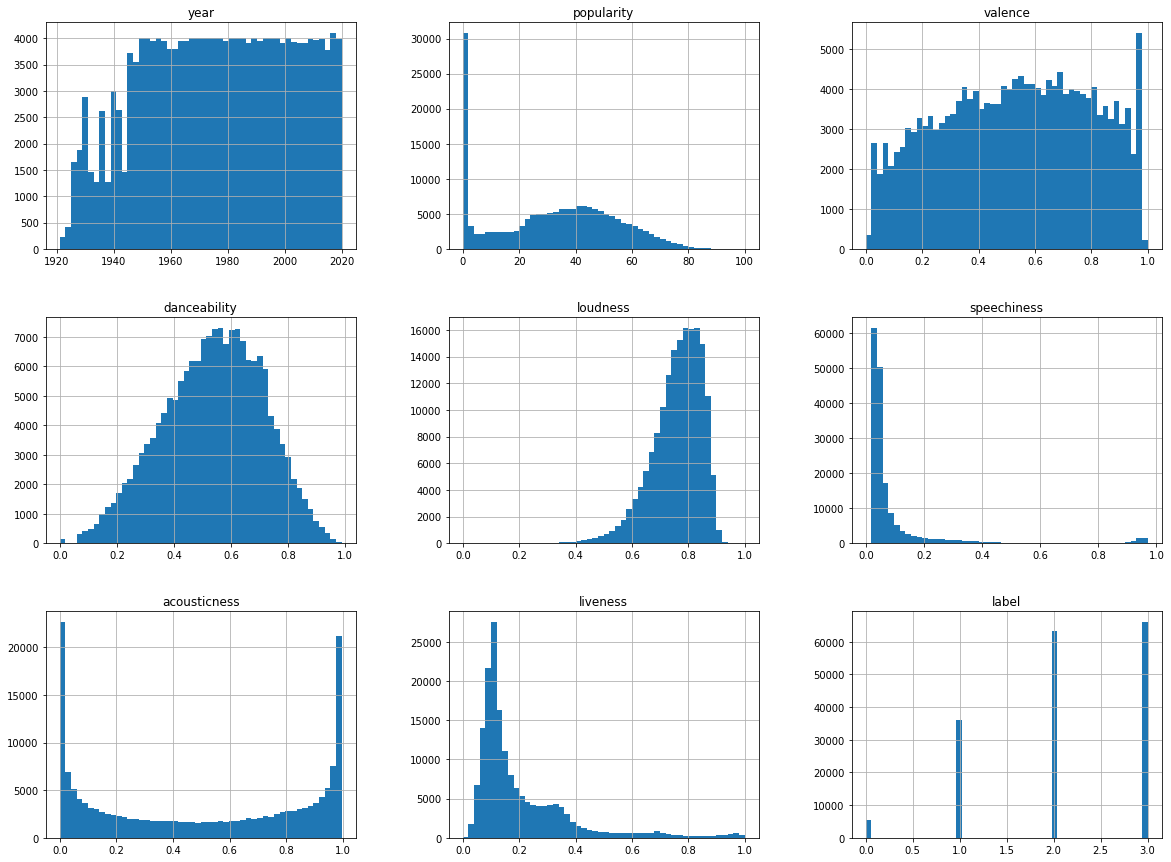

In [7]:
songs.hist(bins=50,figsize=(20,15))

Danceability

In [8]:
%pip install fitter

You should consider upgrading via the '/home/aayush/git/fitapp_analysis/fitapp_aayush/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Fitting 103 distributions: 100%|██████████| 103/103 [01:24<00:00,  1.22it/s]


{'norm': {'loc': 0.5373955347986852, 'scale': 0.17613721955546152}}

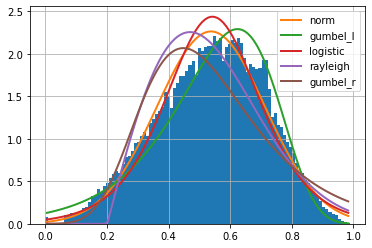

In [21]:
from fitter import Fitter, get_common_distributions, get_distributions
danceability=songs["danceability"].values
f = Fitter(danceability)
f.fit(progress=False)
f.summary()
f.get_best(method = 'sumsquare_error')

Speechiness

Fitting 103 distributions: 100%|██████████| 103/103 [01:11<00:00,  1.45it/s]


{'laplace': {'loc': 0.045, 'scale': 0.06335336735949558}}

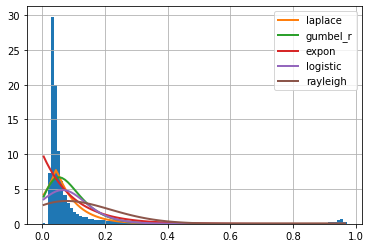

In [20]:
from fitter import Fitter, get_common_distributions, get_distributions
speechiness=songs["speechiness"].values
f = Fitter(speechiness)
f.fit(progress=False)
f.summary()
f.get_best(method = 'sumsquare_error')

Acousticness

Fitting 103 distributions: 100%|██████████| 103/103 [01:09<00:00,  1.48it/s]


{'uniform': {'loc': 0.0, 'scale': 0.996}}

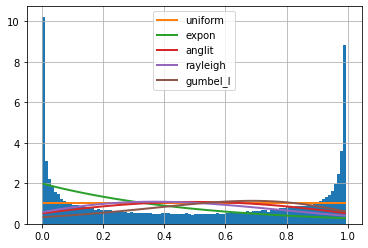

In [16]:
from fitter import Fitter, get_common_distributions, get_distributions
acousticness=songs["acousticness"].values
f = Fitter(acousticness)
f.fit(progress=False)
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 103 distributions: 100%|██████████| 103/103 [01:10<00:00,  1.47it/s]


{'uniform': {'loc': 0.0, 'scale': 1.0}}

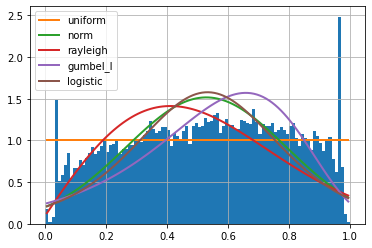

In [17]:
from fitter import Fitter, get_common_distributions, get_distributions
valence=songs["valence"].values
f = Fitter(valence)
f.fit(progress=False)
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 103 distributions: 100%|██████████| 103/103 [01:15<00:00,  1.36it/s]


{'laplace': {'loc': 0.136, 'scale': 0.11092283130094402}}

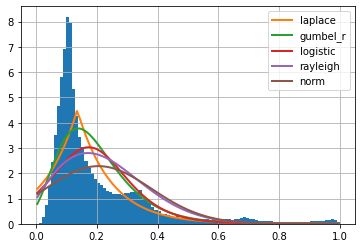

In [18]:
from fitter import Fitter, get_common_distributions, get_distributions
liveness=songs["liveness"].values
f = Fitter(liveness)
f.fit(progress=False)
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 103 distributions: 100%|██████████| 103/103 [01:26<00:00,  1.19it/s]


{'gumbel_l': {'loc': 0.8004193058243345, 'scale': 0.0690033070151354}}

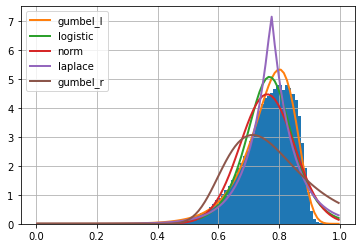

In [19]:
from fitter import Fitter, get_common_distributions, get_distributions
loudness=songs["loudness"].values
f = Fitter(loudness)
f.fit(progress=False)
f.summary()
f.get_best(method = 'sumsquare_error')